In [17]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

data = pd.read_csv('scrapdet.csv')

In [3]:
# -*- coding: utf-8 -*-
import scrapy


class DetikSpider(scrapy.Spider):
    name = 'detik'
    allowed_domains = ['news.detik.com']
    start_urls = ['https://news.detik.com/indeks/']
    date = '11/11/2018'

    def parse(self, response):
        # Dapatkan semua link yang ada pada halaman tersebut
        links = response.css("#indeks-container > li > article > div > a::attr(href)").extract()
        
        # Jika ada link berita (berarti bukan halaman kosong)
        if (len(links) > 0) :
            for link in links:
                berita_url = response.urljoin(link)
                # Buat scrapy.Request baru untuk membuka link berita tersebut
                # Gunakan fungsi parse_berita untuk memproses response
                yield scrapy.Request(url=berita_url, callback=self.parse_berita)
            
            # Cek halaman aktif saat ini
            current_page = response.css("body > div.container > div.content > div.lf_content.boxlr.w870 > div.center > div > a.selected::text").extract_first()
            # Buat URL untuk scrapping halaman selanjutnya
            next_page_url = response.urljoin(self.start_urls[0] + 'all/' + str(int(current_page) + 1) + '?date=' + self.date)
            yield scrapy.Request(url=next_page_url, callback=self.parse)
        
        # Jika tidak ada link berita, maka artinya halaman kosong dan proses crawling selesai
        else:
            return        
    
    def parse_berita(self, response):
        # Simpan data dari berita yang berhasil dibuka
        yield {
            'url' : response.xpath("/html/head/meta[@property='og:url']/@content").extract_first(),
            'keywords': response.xpath("/html/head/meta[@name='keywords']/@content").extract_first(),
            'title': response.css("head > title::text").extract_first(),
            'createdate': response.xpath("/html/head/meta[@name='createdate']/@content").extract_first(),
            'publishdate': response.xpath("/html/head/meta[@name='publishdate']/@content").extract_first(),
            'author': response.xpath("/html/head/meta[@name='author']/@content").extract_first(),
            'description': response.xpath("/html/head/meta[@property='og:description']/@content").extract_first(),
            'kota': response.css("#detikdetailtext > b::text").extract_first(),
            'text': response.css("#detikdetailtext").extract_first()
        }

In [2]:
data

NameError: name 'data' is not defined

In [30]:
html

b'<!DOCTYPE html>\n<html>\n<head>\n    <title>Indeks berita terbaru hari ini dari isu terkini di indonesia</title>\n<meta name="description" content="Indeks berita terbaru hari ini dari peristiwa, kecelakaan, kriminal, hukum, berita unik, Politik, dan liputan khusus di Indonesia dan Internasional" itemprop="description" />\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<link href="https://plus.google.com/+detikcom" rel="publisher" />\n\n\t\t<meta property="og:type" content="article" />\n\t\t<meta property="og:site_name" content="detiknews" />\n\t\t<meta property="og:title" content="Indeks berita terbaru hari ini dari isu terkini di indonesia" />\n\t\t<meta property="og:image" content="https://akcdn.detik.net.id/logo_tematik/logodetiknews.png" />\n\t\t<meta property="og:description" content="Indeks berita terbaru hari ini dari peristiwa, kecelakaan, kriminal, huk

In [18]:
data

,url,keywords,title,createdate,publishdate,author,description,kota,text
0,https://news.detik.com/read/2018/11/18/143336/...,"kpk,bupati pakpak bharat,ott bupati pakpak bha...",Bupati Pakpak Bharat yang di-OTT KPK Punya Har...,2018/11/18 14:33:36,2018/11/18 14:39:36,Mochamad Zhacky,"Bupati Pakpak Bharat, Remigo Yolando Berutu, t...",Jakarta,"<div class=""detail_text"" id=""detikdetailtext"">..."
1,https://news.detik.com/read/2018/11/18/143922/...,"ruhut sitompul,anak pki",Ini Kata Pihak Ruhut Sitompul soal Imbauan Min...,2018/11/18 14:39:22,2018/11/18 14:42:59,Tsarina Maharani,Eks anggota DPR Ruhut Sitompul didesak segera ...,Jakarta,"<div class=""detail_text"" id=""detikdetailtext"">..."
2,https://news.detik.com/read/2018/11/18/140645/...,"birojatim,buaya,bengawan solo,buaya bengawan solo",Warga Percaya Kemunculan Buaya di Bengawan Sol...,2018/11/18 14:06:45,2018/11/18 14:09:45,Ainur Rofiq,Penampakan buaya di Bengawan Solo memunculkan ...,Tuban,"<div class=""detail_text"" id=""detikdetailtext"">..."
3,https://news.detik.com/read/2018/11/18/141607/...,"birojabar,angklung,ridwan kamil",Ridwan Kamil Perintahkan Tanah Tak Berfungsi D...,2018/11/18 14:16:07,2018/11/18 14:35:07,Tri Ispranoto,Gubernur Jabar Ridwan Kamil menginstruksikan p...,Bandung,"<div class=""detail_text"" id=""detikdetailtext"">..."
4,https://news.detik.com/readfoto/2018/11/18/143...,"bupati pakpak bharat,ott kpk,ott bupati pakpak...",Potret Bupati Remigo yang Kena OTT KPK,2018/11/18 14:36:12,2018/11/18 14:43:12,dok. www.pakpakbharatkab.go.id,Bupati Pakpak Bharat Remigo Y Berutu kena OTT ...,NaN,NaN
5,https://news.detik.com/read/2018/11/18/142749/...,"poster raja jokowi,budiman sudjatmiko,pdip,pil...","Soal 'Raja Jokowi', PDIP: Ibarat Tusuk Pedang ...",2018/11/18 14:27:49,2018/11/18 14:44:49,Usman Hadi,Budiman Sudjatmiko mengatakan pemasangan poste...,Yogyakarta,"<div class=""detail_text"" id=""detikdetailtext"">..."
6,https://news.detik.com/readfoto/2018/11/18/144...,"bupati remigo,bupati pakpak bharat,ott bupati ...","Foto: Bergaya Sporty, Bupati Pakpak Bharat Rem...",2018/11/18 14:44:36,2018/11/18 14:52:36,Eva Safitri,Bupati Pakpak Bharat Remigo Y Berutu yang kena...,NaN,NaN
7,https://news.detik.com/read/2018/11/18/144631/...,"bupati pakpak bharat,ott bupati pakpak bharat,kpk",Bupati Pakpak Bharat Tiba di KPK,2018/11/18 14:46:31,2018/11/18 14:49:31,Eva Safitri,"Bupati Pakpak Bharat, Remigo Yolando Berutu, y...",Jakarta,"<div class=""detail_text"" id=""detikdetailtext"">..."
8,https://news.detik.com/read/2018/11/18/150524/...,"sandiaga uno,pilpres 2019,kampanye pilpres,ema...","Dituding Manfaatkan Emak-emak, Sandi: Sebelah ...",2018/11/18 15:05:24,2018/11/18 15:19:24,Pertiwi,"""Kami bukan angkat emak-emak tapi kami angkat ...",Kabupaten Magelang,"<div class=""detail_text"" id=""detikdetailtext"">..."
9,https://news.detik.com/read/2018/11/18/152132/...,"mayat,penemuan mayat,bogor",Mayat Dalam Drum Ditemukan Pemulung di Bogor,2018/11/18 15:21:32,2018/11/18 15:27:32,Farhan,Mayat tersebut pertama kali ditemukan sekitar ...,Jakarta,"<div class=""detail_text"" id=""detikdetailtext"">..."


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))


There are 975 observations and 8 features in this dataset. 



In [4]:
print("There are {} types of keywords in this dataset such as {}... \n".format(len(data.keywords.unique()),
                                                                           ", ".join(data.keywords.unique()[0:5])))

There are 897 types of keywords in this dataset such as kpk,bupati pakpak bharat,ott bupati pakpak bharat,lhkpn, ruhut sitompul,anak pki, birojatim,buaya,bengawan solo,buaya bengawan solo, birojabar,angklung,ridwan kamil, bupati pakpak bharat,ott kpk,ott bupati pakpak bharat... 



In [19]:
data[["keywords", "description","title"]]

,keywords,description,title
0,"kpk,bupati pakpak bharat,ott bupati pakpak bha...","Bupati Pakpak Bharat, Remigo Yolando Berutu, t...",Bupati Pakpak Bharat yang di-OTT KPK Punya Har...
1,"ruhut sitompul,anak pki",Eks anggota DPR Ruhut Sitompul didesak segera ...,Ini Kata Pihak Ruhut Sitompul soal Imbauan Min...
2,"birojatim,buaya,bengawan solo,buaya bengawan solo",Penampakan buaya di Bengawan Solo memunculkan ...,Warga Percaya Kemunculan Buaya di Bengawan Sol...
3,"birojabar,angklung,ridwan kamil",Gubernur Jabar Ridwan Kamil menginstruksikan p...,Ridwan Kamil Perintahkan Tanah Tak Berfungsi D...
4,"bupati pakpak bharat,ott kpk,ott bupati pakpak...",Bupati Pakpak Bharat Remigo Y Berutu kena OTT ...,Potret Bupati Remigo yang Kena OTT KPK
5,"poster raja jokowi,budiman sudjatmiko,pdip,pil...",Budiman Sudjatmiko mengatakan pemasangan poste...,"Soal 'Raja Jokowi', PDIP: Ibarat Tusuk Pedang ..."
6,"bupati remigo,bupati pakpak bharat,ott bupati ...",Bupati Pakpak Bharat Remigo Y Berutu yang kena...,"Foto: Bergaya Sporty, Bupati Pakpak Bharat Rem..."
7,"bupati pakpak bharat,ott bupati pakpak bharat,kpk","Bupati Pakpak Bharat, Remigo Yolando Berutu, y...",Bupati Pakpak Bharat Tiba di KPK
8,"sandiaga uno,pilpres 2019,kampanye pilpres,ema...","""Kami bukan angkat emak-emak tapi kami angkat ...","Dituding Manfaatkan Emak-emak, Sandi: Sebelah ..."
9,"mayat,penemuan mayat,bogor",Mayat tersebut pertama kali ditemukan sekitar ...,Mayat Dalam Drum Ditemukan Pemulung di Bogor


In [37]:
keywords = data.groupby("keywords")

In [7]:
description = data.groupby("description")

In [38]:
keywords.describe()

author         \
                                                    count unique   
keywords                                                           
38 anggota dprd sumut tersangka,38 anggota dprd...      1      1   
ABC Australia,abc australia,australia plus abc,...      2      1   
ABC Australia,abc australia,australia plus abc,...      1      1   
ABC Australia,abc australia,australia plus abc,...      1      1   
ABC Australia,abc australia,australia plus abc,...      1      1   
ABC Australia,abc australia,australia,bayi prem...      1      1   
ABC Australia,abc australia,australia,caleg             1      1   
ABC Australia,abc australia,australia,darwin            1      1   
ABC Australia,abc australia,china,australia             1      1   
ABC Australia,abc australia,gaji guru,indonesia         1      1   
ABC Australia,abc australia,japan airlines,jepa...      1      1   
ABC Australia,abc australia,melbourne,australia         1      1   
ABC Australia,rohingya,mike pence,pemulangan ro...      1      1   
Anies Baswedan,apel siaga banjir,anies baswedan...      1      1   
BBC Magazine,bbc magazine,bbc,mycotech                  1      1   
BBC Magazine,bbc magazine,inggris,london                1      1   
BBC Magazine,bbc magazine,selandia baru,bbc world       1      1   
BBC World,bbc world,bbc,jenewa,pink legacy              1      1   
BBC World,bbc world,bbc,rohingya                        1      1   
BBC World,bbc world,denmark,tanzania                    1      1   
BBC World,bbc world,gaza,palestina                      1      1   
BBC World,bbc world,jamal khashoggi,arab saudi          1      1   
BBC World,bbc world,yaman,konflik yaman                 1      1   
DW (News),dw,angela merkel,jerman                       1      1   
DW (News),dw,inggris,brexit,theresa may                 1      1   
DW (News),dw,rusia,putin                                1      1   
DW (News),dw,yunani,perang troya,tenea                  1      1   
DW (Soft News),dw news,perubahan iklim,dw               1      1   
DW (Soft News),dw news,rumah lelang christie,da...      1      1   
Dinas Kehutanan dki jakarta,dinas kehutanan dki...      1      1   
...                                                   ...    ...   
survei pilpres,lembaga survei,csis                      1      1   
tampang boyolali,bupati boyolali dilaporkan,pra...      1      1   
tanah retak di trenggalek,tanah retak,pemkab tr...      1      1   
tanggul kali ancol,kali ancol                           1      1   
tengkorak manusia,gantung diri,birojabar,sukabumi       1      1   
the police, ngompol                                     1      1   
tni ad,aarm 2018                                        1      1   
tni gadungan,banyuwangi,penipuan di banyuwangi,...      1      1   
toko emas kemalingan,mojokerto,birojatim                1      1   
tokopedia,jual gambar hard disk                         1      1   
topan,topan gaja,india                                  1      1   
transjakarta,penganiayaan                               1      1   
trump,donald trump,elvis presley                        1      1   
turap,turap kali item,kali item                         1      1   
turki,jamal khashoggi,arab saudi                        1      1   
umk jatim,umk 2019,birojatim,gubernur soekarwo          1      1   
wagub dki jakarta,fit and proper test wagub dki...      1      1   
wagub dki jakarta,pks,gerindra                          1      1   
wagub dki pengganti sandi,wagub dki,pks,gerindra        1      1   
wagub dki,pks,gerindra                                  1      1   
wagub dki,sandiaga uno,pks                              1      1   
wapres jk,jusuf kalla,cpns                              1      1   
waring kali item,kali item,waring kali item dib...      1      1   
waring kali item,waring kali item dibongkar,kal...      1      1   
waring kali item,waring kali item dibongkar,war...      1      1   
waring kali item,waring,kali item,warin

In [9]:
description.describe().head()

author         \
                                                    count unique   
description                                                        
"Angka ini (DPTHP tahun 2019) dibandingkan deng...      1      1   
"Apa yang disampaikan Prabowo hanya retorika ko...      1      1   
"Belum ada konfirmasi dari KPK tentang pelimpah...      1      1   
"Bu, tolong dong direkam nanti saya kirim ke ma...      1      1   
"Buayanya itu di seberang. Lihat orang banyak t...      1      1   

                                                                            \
                                                                       top   
description                                                                  
"Angka ini (DPTHP tahun 2019) dibandingkan deng...       Yulida Medistiara   
"Apa yang disampaikan Prabowo hanya retorika ko...  Gibran Maulana Ibrahim   
"Belum ada konfirmasi dari KPK tentang pelimpah...     Dony Indra Ramadhan   
"Bu, tolong dong direkam nanti saya kirim ke ma...            Isal Mawardi   
"Buayanya itu di seberang. Lihat orang banyak t...             Ainur Rofiq   

                                                        createdate         \
                                                   freq      count unique   
description                                                                 
"Angka ini (DPTHP tahun 2019) dibandingkan deng...    1          1      1   
"Apa yang disampaikan Prabowo hanya retorika ko...    1          1      1   
"Belum ada konfirmasi dari KPK tentang pelimpah...    1          1      1   
"Bu, tolong dong direkam nanti saya kirim ke ma...    1          1      1   
"Buayanya itu di seberang. Lihat orang banyak t...    1          1      1   

                                                                              \
                                                                    top freq   
description                                                                    
"Angka ini (DPTHP tahun 2019) dibandingkan deng...  2018/11/16 16:34:09    1   
"Apa yang disampaikan Prabowo hanya retorika ko...  2018/11/15 17:42:01    1   
"Belum ada konfirmasi dari KPK tentang pelimpah...  2018/11/16 20:43:32    1   
"Bu, tolong dong direkam nanti saya kirim ke ma...  2018/11/15 14:36:58    1   
"Buayanya itu di seberang. Lihat orang banyak t...  2018/11/16 19:41:34    1   

                                                   keywords        ...   \
                                                      count unique ...    
description                                                        ...    
"Angka ini (DPTHP tahun 2019) dibandingkan deng...        1      1 ...    
"Apa yang disampaikan Prabowo hanya retorika ko...        1      1 ...    
"Belum ada konfirmasi dari KPK tentang pelimpah...        1      1 ...    
"Bu, tolong dong direkam nanti saya kirim ke ma...        1      1 ...    
"Buayanya itu di seberang. Lihat orang banyak t...        1      1 ...    

                                                            publishdate       \
                                                                    top freq   
description                                                                    
"Angka ini (DPTHP tahun 2019) dibandingkan deng...  2018/11/16 16:40:09    1   
"Apa yang disampaikan Prabowo hanya retorika ko...  2018/11/15 17:45:01    1   
"Belum ada konfirmasi dari KPK tentang pelimpah...  2018/11/16 20:58:32    1   
"Bu, tolong dong direkam nanti saya kirim ke ma...  2018/11/15 14:46:58    1   
"Buayanya itu di seberang. Lihat orang banyak t...  2018/11/16 19:50:34    1   

                                                    text         \
                                                   count unique   
description                                                       
"Angka ini (DPTHP tahun 2019) dibandingkan deng...     1      1   
"Apa yang disampaikan Prabowo hanya retorika ko...     1      1   
"Belum ada konfirmasi dari KPK tentang pelimpa

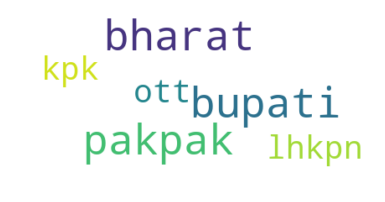

In [12]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
text = " ".join(review for review in data.description)

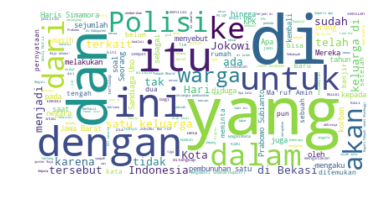

In [15]:
#Menampilkan kata-kata yang sering muncul dan frekuinsi paling banyak
stopwords = set(STOPWORDS)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()